In [3]:
b = dict()
b

{}

In [4]:
a = (4.8-5)/(0.5)*(6.344)
a

-2.5376000000000025

In [7]:
import pickle
import dill

In [23]:
with open('preprocessor.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

EOFError: Ran out of input

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as snsa

C:\Users\dell\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
df = pd.read_csv('Data.csv')
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [3]:
df.rename(columns={'Country':'Test2'})

,Test2,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [4]:
df.shape[0]

10

In [7]:
df.select_dtypes(include=['object']).columns.tolist()

['Country', 'Purchased']

In [8]:
cat_list = df.select_dtypes(include=['object']).columns.tolist()
cat_list

['Country', 'Purchased']

In [9]:
df.columns

Index(['Country', 'Age', 'Salary', 'Purchased'], dtype='object')

In [10]:
#Converting into features into dependent and Independent variables
x = df.drop(['Purchased'],axis=1).values
y = df['Purchased'].values

In [ ]:
x

In [18]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [19]:
print(type(x))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [20]:
df.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [21]:
df.loc[(df['Age'].isnull()) | (df['Salary'].isnull())]

,Country,Age,Salary,Purchased
4,Germany,40.0,NaN,Yes
6,Spain,NaN,52000.0,No


### EDA on Age & Salary Part

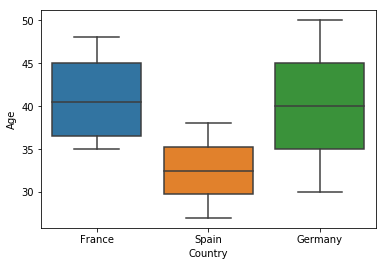

In [22]:
sns.boxplot(x='Country',y='Age',data=df)

##### Above chart shows that average age is different based on country to country! We can not directly impute mean age for all the countries.

In [23]:
#We can see there are two rows where Age & Salary is missing. Let's handle missing values

In [24]:
mean_age = df['Age'].mean()
print('Mean of Age is', mean_age)
mean_salary = df['Salary'].mean()
print('Mean of Salary is', mean_salary)


Mean of Age is 38.77777777777778
Mean of Salary is 63777.77777777778


In [25]:
df['Age'].fillna(mean_age,inplace=True)
df['Salary'].fillna(mean_salary,inplace=True)

In [26]:
df.isnull().sum()

Country      0
Age          0
Salary       0
Purchased    0
dtype: int64

In [27]:
#Another method to update missing values is using Imputer from sklearn library
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')
imputer.fit(x[:,1:3])
x[:,1:3] = imputer.transform(x[:,1:3])

In [28]:
print(x)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [29]:
print(np.nan)

nan


### Label Encoder - Label Encoding to categorical values

In [30]:
pd.get_dummies(df['Country'])

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0
5,1,0,0
6,0,0,1
7,1,0,0
8,0,1,0
9,1,0,0


In [31]:
df['Country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [32]:
dict_ = dict(df['Country'].value_counts())
# df['Country'] = df['Country'].map(dict_)

In [33]:
dict_

{'France': 4, 'Spain': 3, 'Germany': 3}

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [35]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder= 'passthrough')
x = np.array(ct.fit_transform(x))

In [36]:
x

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [37]:
df2 = pd.get_dummies(df['Country'])
df2

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0
5,1,0,0
6,0,0,1
7,1,0,0
8,0,1,0
9,1,0,0


In [38]:
df.drop(['Country'],axis=1,inplace=True)

In [39]:
maindf = pd.concat([df2,df.drop(['Purchased'],axis=1)],axis=1)

In [40]:
maindf

,France,Germany,Spain,Age,Salary
0,1,0,0,44.000000,72000.000000
1,0,0,1,27.000000,48000.000000
2,0,1,0,30.000000,54000.000000
3,0,0,1,38.000000,61000.000000
4,0,1,0,40.000000,63777.777778
5,1,0,0,35.000000,58000.000000
6,0,0,1,38.777778,52000.000000
7,1,0,0,48.000000,79000.000000
8,0,1,0,50.000000,83000.000000
9,1,0,0,37.000000,67000.000000


In [41]:
#Label Encoder - Label Encoding in Dependent variable

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [43]:
print(df.select_dtypes(include=['category']))

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [44]:
df.columns

Index(['Age', 'Salary', 'Purchased'], dtype='object')

## We have to apply Feature Scaling after Spliting the dataset into Training Set & Training Set. As we have to keep separate the Test dataset from Training dataset. To provide information leakage from the test dataset. Thats why we keep test data separate and perform splitting before Feature Scaling

#### Let's split the training and test dataset.

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [47]:
print(x_train)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


### Feature Scaling

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
sc = StandardScaler()

#### Please note that Feature Sclaing does not need to perform on the dummy variables, which we have created using Label Encoding & One-Hot Encoding

In [56]:
x_train[:,3:] = sc.fit_transform(x_train[:,3:])
x_test[:,3:] = sc.transform(x_test[:,3:])

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [57]:
x_train

array([[0.0, 0.0, 1.0, -0.19159184384578554, -1.0781259408412427],
       [0.0, 1.0, 0.0, -0.014117293757057846, -0.07013167641635404],
       [1.0, 0.0, 0.0, 0.5667085065333239, 0.6335624327104546],
       [0.0, 0.0, 1.0, -0.3045301939022487, -0.307866172742979],
       [0.0, 0.0, 1.0, -1.901801144700799, -1.4204636155515822],
       [1.0, 0.0, 0.0, 1.1475343068237056, 1.2326533634535488],
       [0.0, 1.0, 0.0, 1.4379472069688966, 1.5749910381638883],
       [1.0, 0.0, 0.0, -0.7401495441200352, -0.5646194287757336]],
      dtype=object)

In [58]:
x_test

array([[0.0, 1.0, 0.0, -1.0, -0.9999999999999998],
       [1.0, 0.0, 0.0, 1.0000000000000002, 1.0]], dtype=object)